In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Udemy/TensorFlow/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [6]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [7]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [9]:
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_valid, y_valid = valid['features'], valid['labels']

In [10]:
x_train.shape

(34799, 32, 32, 3)

In [11]:
y_train.shape

(34799,)

In [12]:
x_test.shape

(12630, 32, 32, 3)

In [13]:
x_valid.shape

(4410, 32, 32, 3)

# Data visualization

1

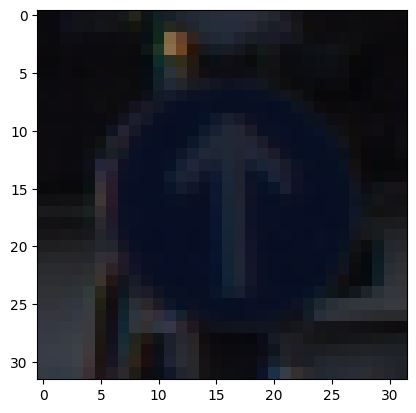

In [15]:
# Example
i = 3100
plt.imshow(x_test[i])
y_train[i]

# Data processing

In [16]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [17]:
x_train_gray = np.sum(x_train / 3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test / 3, axis=3, keepdims=True)
x_valid_gray = np.sum(x_valid / 3, axis=3, keepdims=True)

In [18]:
x_train_gray.shape

(34799, 32, 32, 1)

In [19]:
x_test_gray.shape

(12630, 32, 32, 1)

In [20]:
x_valid_gray.shape

(4410, 32, 32, 1)

In [39]:
x_train_gray_norm = (x_train_gray - 128) / 128
x_test_gray_norm = (x_test_gray - 128) / 128
x_valid_gray_norm = (x_valid_gray - 128) / 128

In [40]:
x_train_gray_norm

array([[[[-0.39583333],
         [-0.40625   ],
         [-0.390625  ],
         ...,
         [-0.8125    ],
         [-0.79947917],
         [-0.8046875 ]],

        [[-0.50520833],
         [-0.5       ],
         [-0.46354167],
         ...,
         [-0.8203125 ],
         [-0.796875  ],
         [-0.8046875 ]],

        [[-0.63541667],
         [-0.58854167],
         [-0.5859375 ],
         ...,
         [-0.8125    ],
         [-0.79427083],
         [-0.79947917]],

        ...,

        [[-0.8515625 ],
         [-0.859375  ],
         [-0.85677083],
         ...,
         [-0.84635417],
         [-0.84635417],
         [-0.84895833]],

        [[-0.859375  ],
         [-0.8515625 ],
         [-0.84635417],
         ...,
         [-0.8515625 ],
         [-0.84375   ],
         [-0.85416667]],

        [[-0.8515625 ],
         [-0.8515625 ],
         [-0.84635417],
         ...,
         [-0.84895833],
         [-0.84114583],
         [-0.84114583]]],


       [[[-0.90625   ],


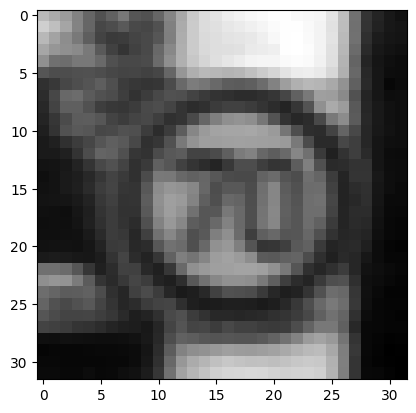

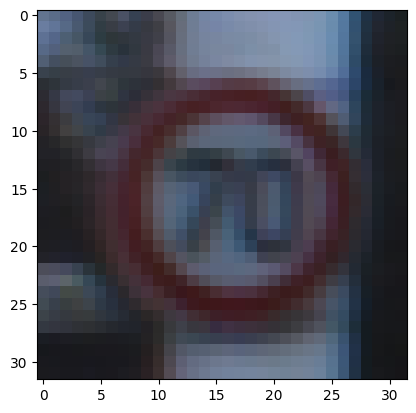

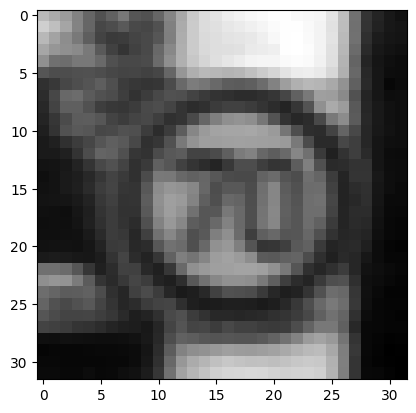

In [42]:
i = 60
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')

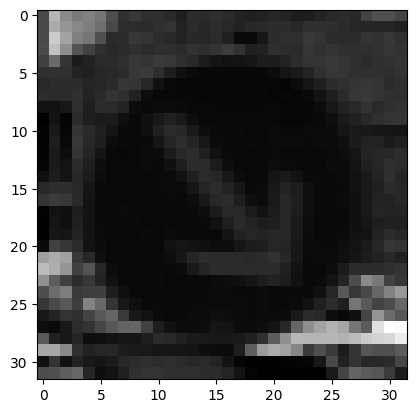

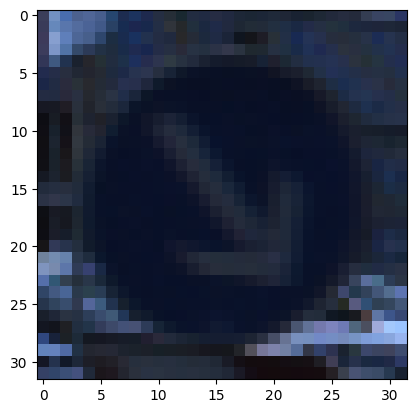

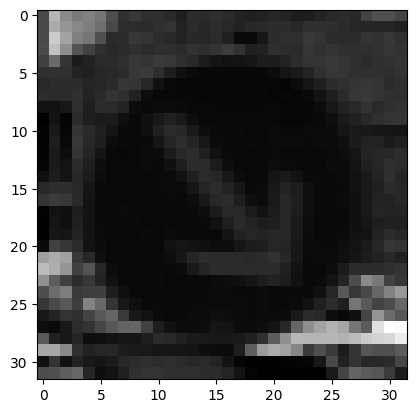

In [43]:
i = 60
plt.imshow(x_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_test[i])
plt.figure()
plt.imshow(x_test_gray_norm[i].squeeze(), cmap='gray')

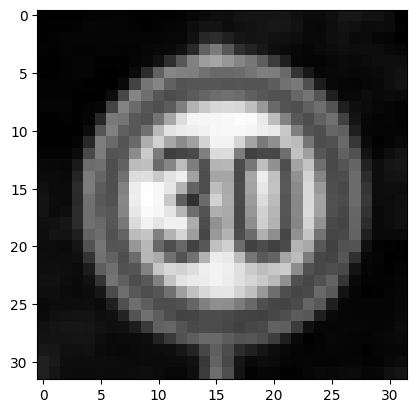

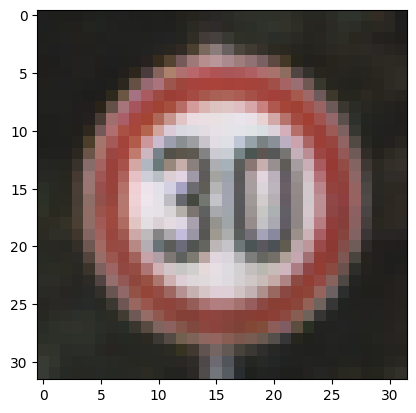

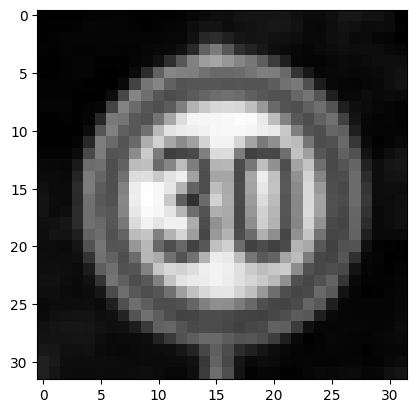

In [45]:
i = 500
plt.imshow(x_valid_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_valid[i])
plt.figure()
plt.imshow(x_valid_gray_norm[i].squeeze(), cmap='gray')

# Lenet Model

In [48]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation = 'relu', input_shape=(32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(units=120, activation = 'relu'))

LeNet.add(layers.Dense(units=84, activation = 'relu'))

LeNet.add(layers.Dense(units=43, activation = 'softmax'))

LeNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [51]:
LeNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
history = LeNet.fit(x_train_gray_norm, y_train, batch_size=500, epochs=20, validation_data=(x_valid_gray_norm, y_valid))

Epoch 1/20
70/70 [==============================] - 15s 210ms/step - loss: 0.0902 - accuracy: 0.9783 - val_loss: 0.5288 - val_accuracy: 0.8787
Epoch 2/20
70/70 [==============================] - 17s 239ms/step - loss: 0.0803 - accuracy: 0.9821 - val_loss: 0.5584 - val_accuracy: 0.8696
Epoch 3/20
70/70 [==============================] - 19s 270ms/step - loss: 0.0751 - accuracy: 0.9822 - val_loss: 0.5719 - val_accuracy: 0.8692
Epoch 4/20
70/70 [==============================] - 23s 327ms/step - loss: 0.0661 - accuracy: 0.9850 - val_loss: 0.5390 - val_accuracy: 0.8730
Epoch 5/20
70/70 [==============================] - 20s 282ms/step - loss: 0.0639 - accuracy: 0.9843 - val_loss: 0.5948 - val_accuracy: 0.8787
Epoch 6/20
70/70 [==============================] - 23s 333ms/step - loss: 0.0586 - accuracy: 0.9862 - val_loss: 0.5865 - val_accuracy: 0.8755
Epoch 7/20
70/70 [==============================] - 27s 381ms/step - loss: 0.0591 - accuracy: 0.9849 - val_loss: 0.5832 - val_accuracy: 0.8744

# Model Assessment

In [55]:
score = LeNet.evaluate(x_test_gray_norm, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 7s 17ms/step - loss: 1.0571 - accuracy: 0.8686
Test loss: 1.0570557117462158
Test accuracy: 0.8685669302940369


In [56]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [58]:
val_accuracy

[0.8786848187446594,
 0.8696145415306091,
 0.8691610097885132,
 0.8730158805847168,
 0.8786848187446594,
 0.8755102157592773,
 0.8743764162063599,
 0.8804988861083984,
 0.8755102157592773,
 0.8809523582458496,
 0.8823129534721375,
 0.8875283598899841,
 0.880725622177124,
 0.8859410285949707,
 0.8918367624282837,
 0.8816326260566711,
 0.8804988861083984,
 0.8866212964057922,
 0.8839002251625061,
 0.8755102157592773]

<ipython-input-59-d5056f61177c>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color='r', label='Training accuracy')


<Figure size 640x480 with 0 Axes>

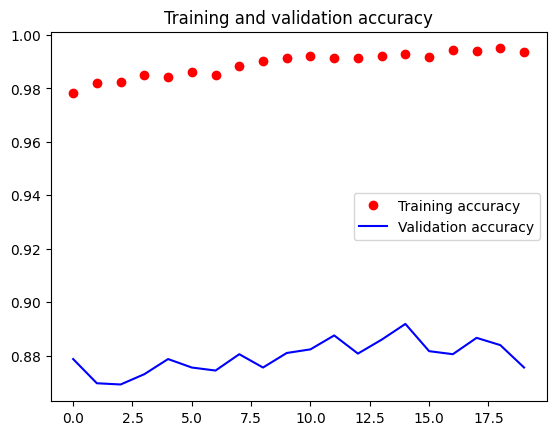

<Figure size 640x480 with 0 Axes>

In [59]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color='r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<ipython-input-60-15d5ec789b48>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', color='r', label='Training loss')


<Figure size 640x480 with 0 Axes>

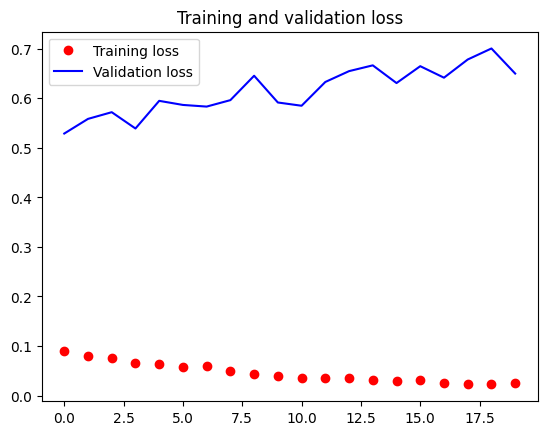

<Figure size 640x480 with 0 Axes>

In [60]:
plt.plot(epochs, loss, 'bo', color='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [69]:
predicted_classes = LeNet.predict(x_test_gray_norm)
predicted_classes = np.argmax(predicted_classes, axis=1)
y_true = y_test

395/395 [==============================] - 6s 14ms/step


In [70]:
predicted_classes

array([16,  1, 38, ...,  5,  7, 10])

<Axes: >

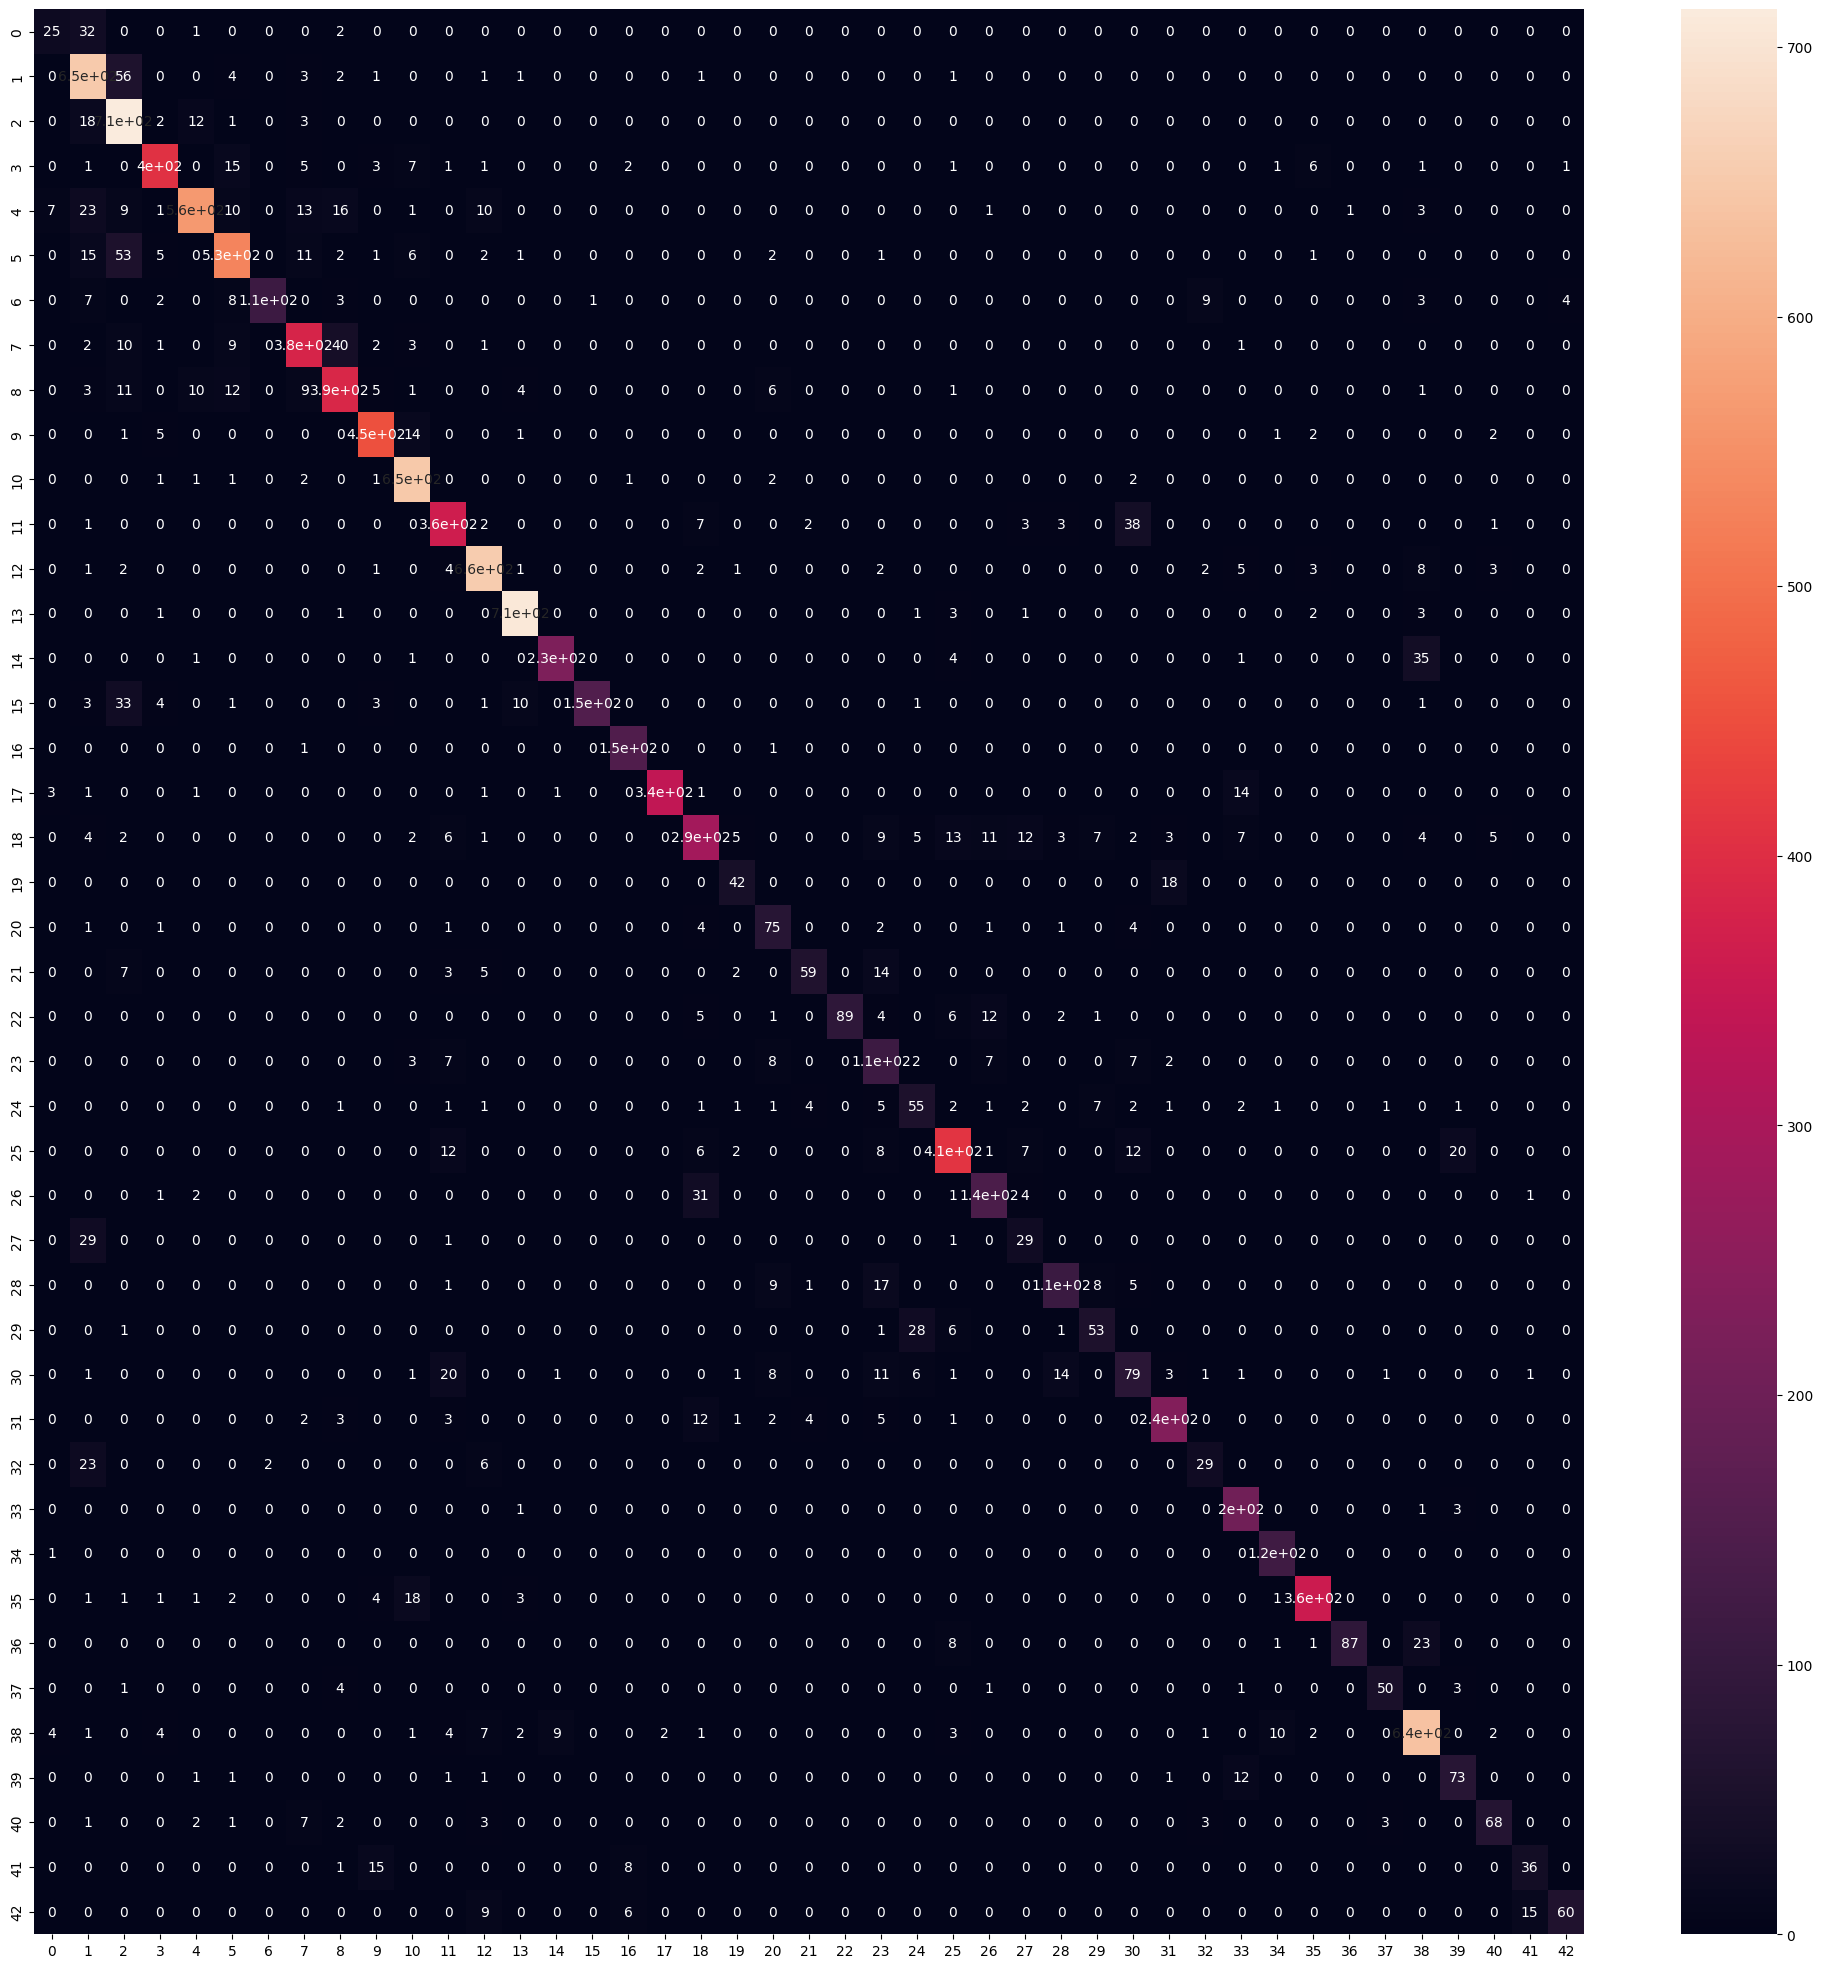

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

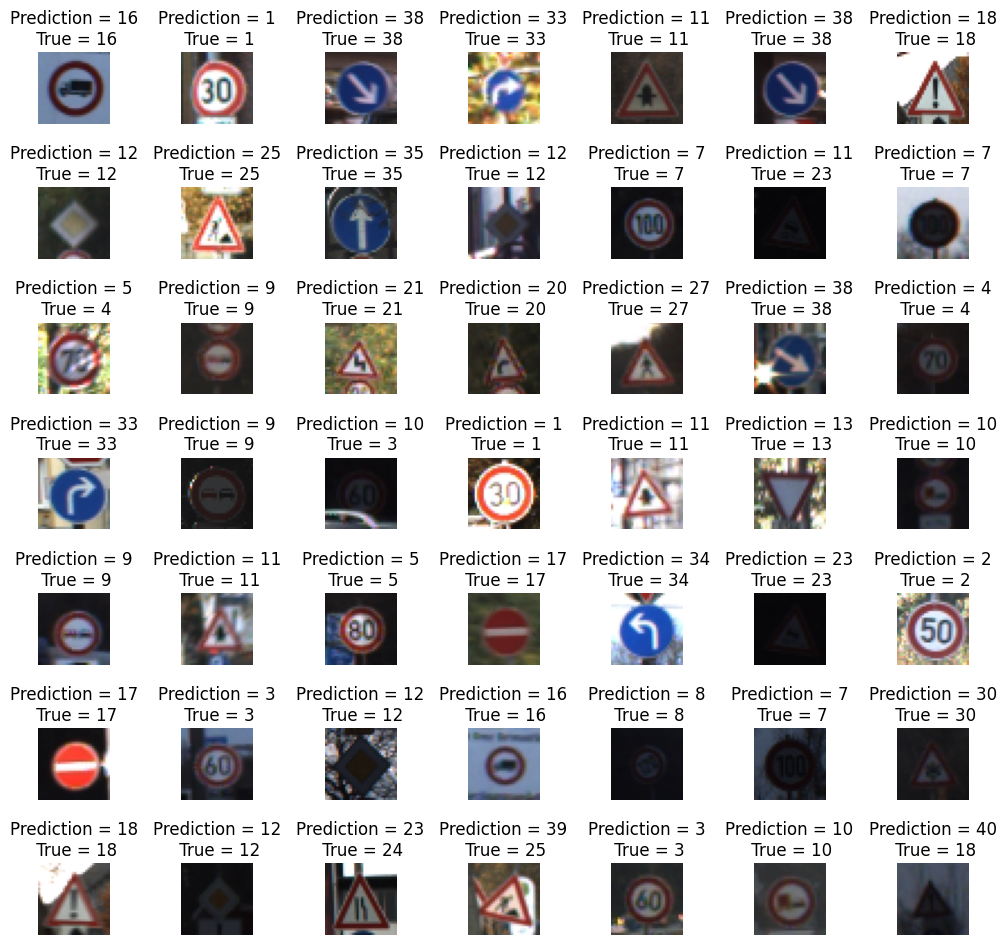

In [72]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)